# ML: Homework 2 - Question 4 through 6
## Arash Latifi - 810197576
### Srping 2022

---
# Q4) Overfitting and Underfitting

First, we create raw data using python numpy list.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
x = np.arange(-10 , 10 , 0.2)
y = 2 * np.cos(x)/(-np.pi) + 2 * np.sin(2*x)/(2*np.pi) + 2 * np.cos (3*x)/(-3*np.pi)

P1) Adding the white gaussian noise to the data.

In [36]:
y1 = y + 0.12 * np.random.standard_normal(size = len(y))
y2 = y + 0.12 * np.random.poisson(lam = 2, size = len(y))

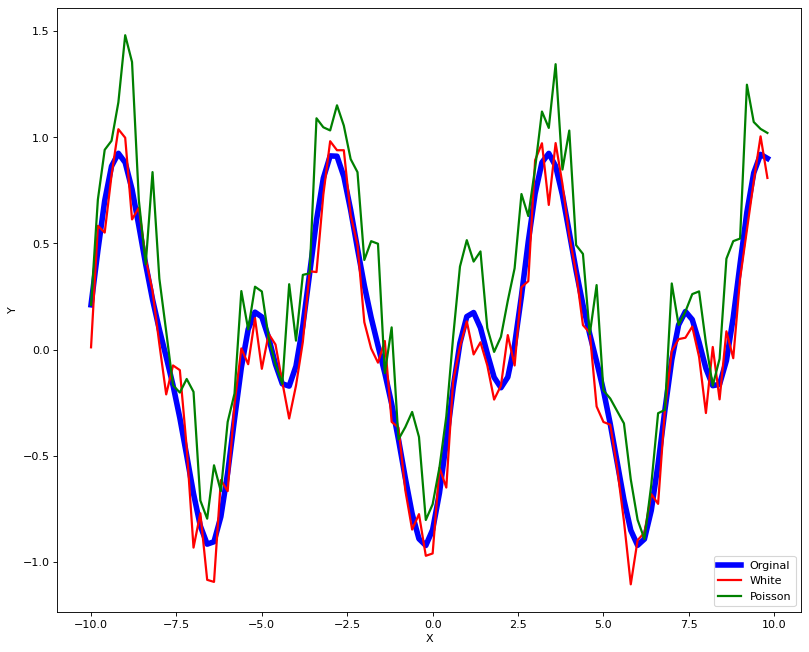

In [107]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, y, color = 'Blue', linewidth = 5)
plt.plot(x, y1, color = 'red', linewidth = 2)
plt.plot(x, y2, color = 'green', linewidth = 2)
plt.legend(["Orginal", "White", "Poisson"], loc ="lower right")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [141]:
yt1 = []
yt2 = []
mse1 = []
mse2 = []
for i in range(15):
    yt1.append(np.poly1d(np.polyfit(x, y1, i+1))(x))
    mse1.append((np.square(y - yt1[i])).mean())
    yt2.append(np.poly1d(np.polyfit(x, y2, i+1))(x))
    mse2.append((np.square(y - yt2[i])).mean())

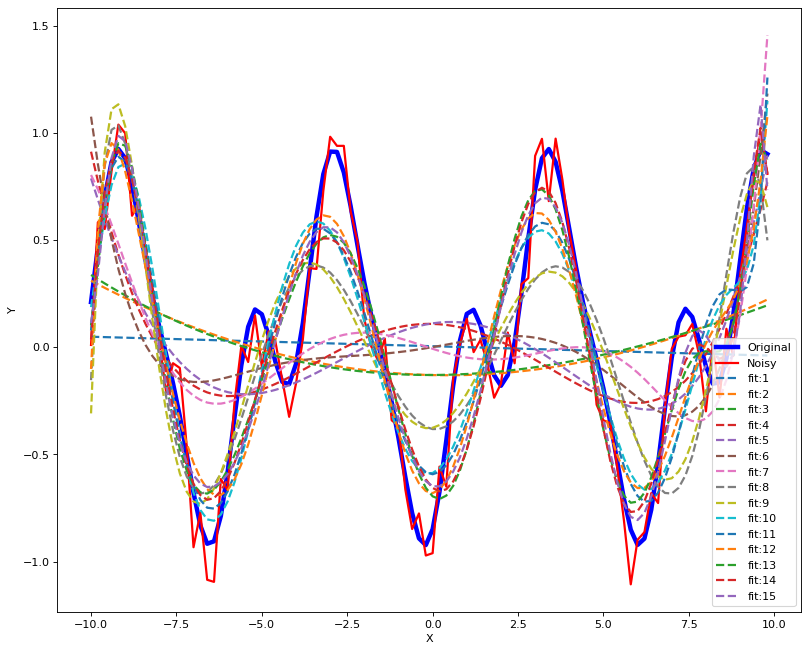

In [118]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, y, linewidth = 4, label = "Original", color = 'blue')
plt.plot(x, y1, linewidth = 2, label = "Noisy", color = 'red')
for i in range(15):
    plt.plot(x, yt1[i], linestyle = 'dashed', linewidth = 2, label = "fit:"+str(i+1))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

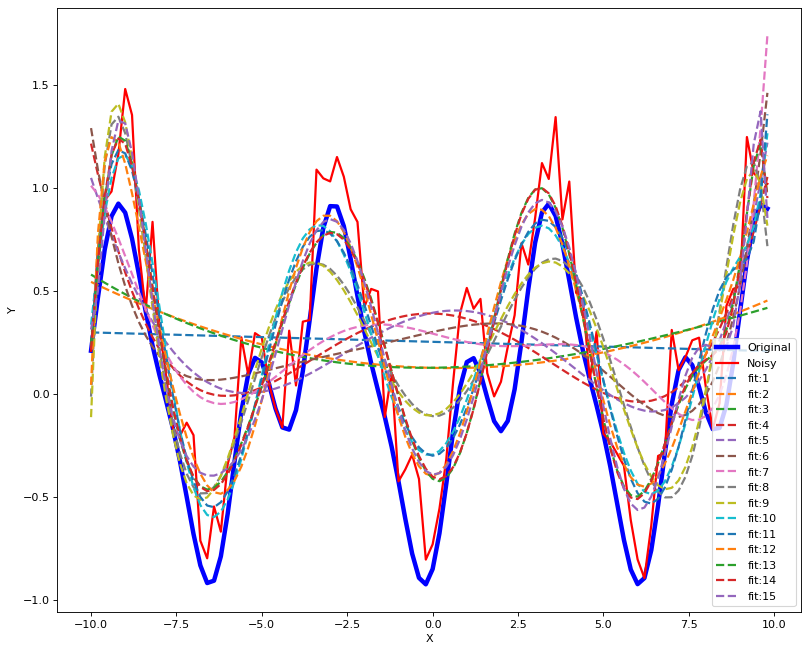

In [110]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, y, linewidth = 4, label = "Original", color = 'blue')
plt.plot(x, y2, linewidth = 2, label = "Noisy", color = 'red')
for i in range(15):
    plt.plot(x, yt2[i], linestyle = 'dashed', linewidth = 2, label = "fit:"+str(i+1))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

توضیحات اینکه کدوم بهرته 

In [143]:
best1 = np.where(mse1 == np.amin(mse1))[0][0]
best2 = np.where(mse2 == np.amin(mse2))[0][0]

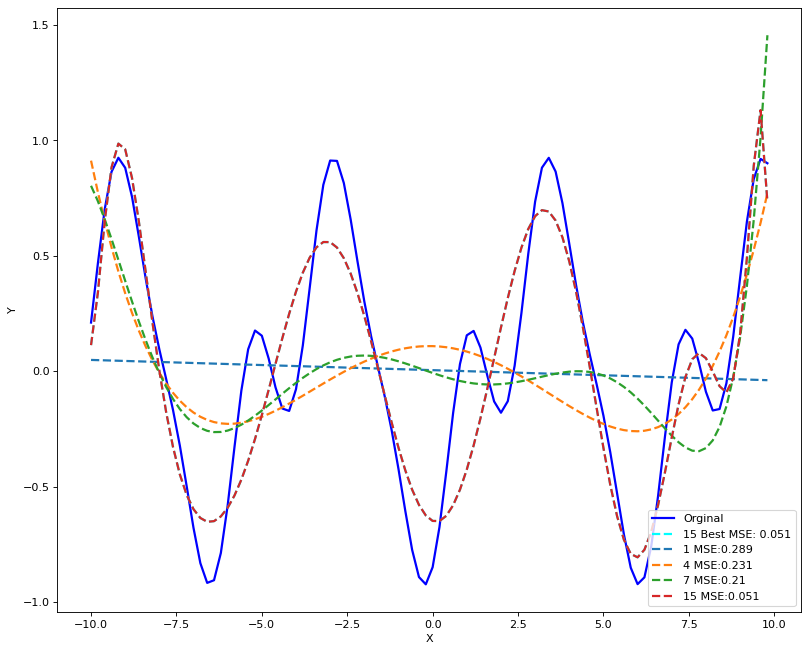

In [144]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'blue')
plt.plot(x, yt1[best1], linestyle = 'dashed', linewidth = 2, label = str(best1+1) + " Best MSE: " + str(round(mse1[best1],3)), color = 'cyan')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt1[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse1[i],3)))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

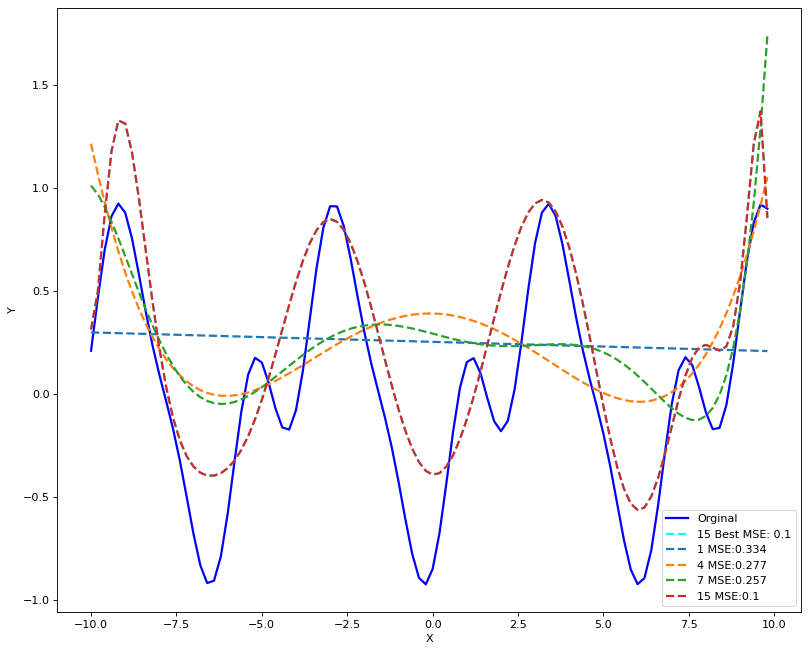

In [145]:
plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x, y, linewidth = 2, label = "Orginal", color = 'blue')
plt.plot(x, yt2[best2], linestyle = 'dashed', linewidth = 2, label = str(best2+1) + " Best MSE: " + str(round(mse2[best2],3)), color = 'cyan')
for i in [0, 3, 6, 14]:
    plt.plot(x, yt2[i], linestyle = 'dashed', linewidth = 2, label = str(i+1) + " MSE:" + str(round(mse2[i],3)))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc ="lower right")
plt.show()

توضیحات بیشتر

 ---

# Q5) Stress Lysis Dataset

In [4]:
print("Q5")

Q5


 ---

# Q6) Logistic Rression

In [90]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [124]:
def DayereSaz(quantity, rho_start, rho_end, center_x, center_y):
    rhos = np.random.rand(quantity,1) * (rho_end-rho_start) + rho_start
    phases = np.random.rand(quantity,1) * 2 * math.pi
    vec = []
    for i in range(len(rhos)):
        vec.append(complex(rhos[i] * math.cos(phases[i]), rhos[i] * math.sin(phases[i])))
    # extract real part
    x = [ele.real+center_x for ele in vec]
    # extract imaginary part
    y = [ele.imag+center_y for ele in vec]
    return x,y

In [150]:
# First Mode: 
x11, y11 = DayereSaz(200, 4, 9, 1.5, 0)
x12, y12 = DayereSaz(200, 0, 6, 1.5, 0)

In [151]:
# Second Mode: 
x21 = np.random.normal(1.5, 1, 100)
y21 = np.random.normal(0, 1, 100)
x22, y22 = DayereSaz(200, 2, 6, 1.5, 0)

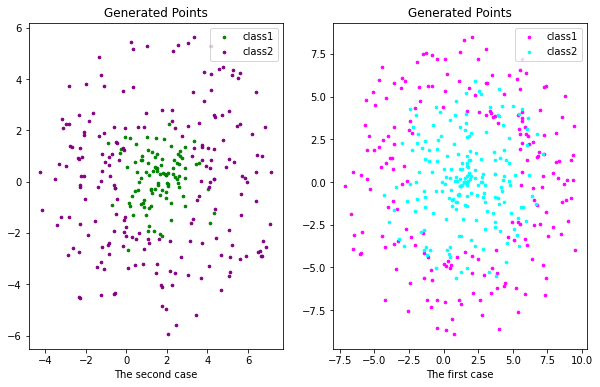

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[1].scatter(x11, y11, color='magenta', s=7, label='class1')
ax[1].scatter(x12, y12, color='cyan', s=7, label='class2')
ax[1].legend(loc ="upper right")
ax[1].set_xlabel(xlabel = 'The first case')

ax[0].scatter(x21, y21, color='green', s=7, label='class1')
ax[0].scatter(x22, y22, color='purple', s=7, label='class2')
ax[0].legend(loc ="upper right")
ax[0].set_xlabel(xlabel = 'The second case')

for a in ax.flat:
    a.set_title("Generated Points", fontsize=12)

In [69]:
# Second Mode:
# 
#  